## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline

In [31]:
df = pd.read_csv('data/human_body_temperature.csv')

# 1) Is the distribution of body temperatures normal?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

In [54]:
data = pd.DataFrame.from_csv('data/human_body_temperature.csv',index_col=None, 
                            encoding = 'utf-8')
temp = data.temperature
data

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


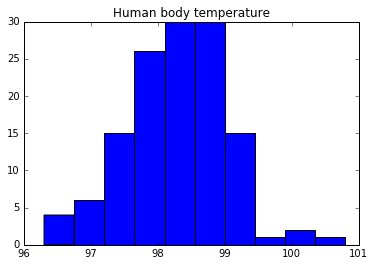

98.249230769230749

In [67]:
plt.hist(temp,bins = 10)
plt.title("Human body temperature")
plt.show()
temp.mean()

In [34]:
# Generate the expected normal curve
mu , sig = 98.2 , np.std(temp)
exp = np.random.normal(mu, sig, temp.count())

In [35]:
chi_sq = sum(((temp - exp)**2)/exp)
chi_sq

1.5839374134804181

The low chi-square for such a large sample set suggests that the data is normally distributed. The extreme p value for DOF 129 at a 0.05 p level is 156.58; well above the caluclated 1.58.

# 2) Is the true population mean really 98.6 degrees F?
Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

A z-test should be used since the sample size is large and s ~= sigma_population

In [42]:
x = temp.mean()
sigma = temp.std()/(temp.count()**0.5)
x, sigma
h = 98.6

Null hypothesis: population mean is 98.6 F,
Alternate hypothesis: population mean is not 98.6 F,
Alpha = 0.05.3 = 0.025

In [45]:
z = (h - x)/sigma
z

5.4548232923645195

The z statistic suggests that the resulting difference is nearly 5.5 standard deviations away from where we would expect it. Thus, we reject the null hypothesis.

### 3) At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [46]:
# Calculate margin of error at 95% confidence level
moe = temp.std()/(temp.count()**0.5)*1.96

In [48]:
ci = [temp.mean() - moe, temp.mean() + moe]

In [53]:
print("A person's temperature is considered abnormal if it is lower than "
      + str(ci[0]) + " or higher than " +  str(ci[1]))

A person's temperature is considered abnormal if it is lower than 98.1231941122 or higher than 98.3752674262


### 4) Is there a significant difference between males and females in normal temperature?
Set up and solve for a two sample hypothesis testing.

In [72]:
fem_data = data[data.gender == 'F']
fem_temp = fem_data.temperature
fem_n = fem_temp.count()
fem_avg = fem_temp.mean()
fem_s = fem_temp.std()

male_data = data[data.gender == 'M']
male_temp = male_data.temperature
male_n = male_temp.count()
male_avg = male_temp.mean()
male_s = male_temp.std()
print(fem_avg, fem_n, male_avg, male_n)

98.3938461538 65 98.1046153846 65


Ho: male_temp - fem_temp = 0, H1: male_temp - fem_temp != 0, alpha = 0.05 => Z = 1.96

In [75]:
st_dev = ((fem_s**2)/fem_n + (male_s**2)/male_n)**0.5
crit_val = st_dev*1.96

In [77]:
print("If " + str(abs(fem_avg - male_avg)) + "is > than " + str(crit_val) + "then we reject the null hypothesis")

If 0.289230769231is > than 0.248045742823then we reject the null hypothesis


The difference in means exceeds that allowed by a 95% confidence. Thus, the averages are different in this sample set.